# nb003に追加していく

In [1]:
import os

import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('ticks')

In [2]:
INPUT_DIR = '../data/inputs/'
OUTPUT_DIR = '../data/outputs/'

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
whole_df = pd.concat([train_df, test_df], ignore_index=True)

In [4]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [5]:
test_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,84.0,23.0,8,19.0,Io Interactive,M
1,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,91.0,17.0,9,132.0,Crystal Dynamics,T
2,Metal Gear Solid 2: Substance,XB,NaN,Action,Konami Digital Entertainment,87.0,28.0,8.5,39.0,KCEJ,M
3,Silent Hill: Homecoming,X360,NaN,Action,Konami Digital Entertainment,70.0,54.0,6.9,180.0,Double Helix Games,M
4,Silent Hill: Homecoming,PS3,NaN,Action,Konami Digital Entertainment,71.0,41.0,6.9,143.0,Double Helix Games,M


In [6]:
# name、publicher、developerの情報は落とすかうまいこと使いたい

In [7]:
# test_df['Platform'].isnull().sum()
# test_df['Genre'].isnull().sum()
test_df[test_df['Genre'].isnull()]

"""
wikiみると1993年Game Gearで発売のスパイダーマンのゲームっぽい
https://ja.wikipedia.org/wiki/アクレイム・エンタテインメント
Actionだけどこれを入れると外部情報の使用になるのでGEN_NANかなあ
"""


'\nwikiみると1993年Game Gearで発売のスパイダーマンのゲームっぽい\nhttps://ja.wikipedia.org/wiki/アクレイム・エンタテインメント\nActionだけどこれを入れると外部情報の使用になるのでGEN_NANかなあ\n'

In [8]:
# math.isnan(test_df.iloc[278]['Genre'])

# type(test_df['Genre'].iloc[276])
judge_g = test_df['Genre'].iloc[278] if type(test_df['Genre'].iloc[278]) == str else 'nan'
print(judge_g)

nan


In [9]:
# これ入れると少しスコアが悪くなって0.1くらい
def _platform_genre(x):
    p = x['Platform'].lower() if x['Platform'] else 'nan'

    judge_g = x['Genre'] if type(x['Genre']) == str else 'nan'
    g = judge_g.lower() if judge_g != 'nan' else 'nan'
    p_and_g = "{}_{}".format(p,g) 
    return p_and_g

test_df['Platform_and_Genre'] = test_df.apply(_platform_genre, axis=1)
train_df['Platform_and_Genre'] = train_df.apply(_platform_genre, axis=1)

test_df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_and_Genre
0,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,84.0,23.0,8,19.0,Io Interactive,M,xb_action
1,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,91.0,17.0,9,132.0,Crystal Dynamics,T,ps_action
2,Metal Gear Solid 2: Substance,XB,NaN,Action,Konami Digital Entertainment,87.0,28.0,8.5,39.0,KCEJ,M,xb_action
3,Silent Hill: Homecoming,X360,NaN,Action,Konami Digital Entertainment,70.0,54.0,6.9,180.0,Double Helix Games,M,x360_action
4,Silent Hill: Homecoming,PS3,NaN,Action,Konami Digital Entertainment,71.0,41.0,6.9,143.0,Double Helix Games,M,ps3_action


In [10]:
# ScoreとCountを掛け算してみて影響しないかな

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train_df['User_Score'] = train_df['User_Score'].replace('tbd', None).astype(float)
test_df['User_Score'] = test_df['User_Score'].replace('tbd', None).astype(float)

# scaler = MinMaxScaler()

# MinMaxで正規化
# train_df[['Critic_Score', 'User_Score']] = scaler.fit_transform(train_df[['Critic_Score', 'User_Score']]) # A, Bカラムのみを正規化
# test_df[['Critic_Score', 'User_Score']] = scaler.fit_transform(test_df[['Critic_Score', 'User_Score']]) # A, Bカラムのみを正規化

# Criticに関して
train_df['Critic_Count_times_Score'] = train_df.apply(lambda x: x['Critic_Count']*x['Critic_Score'], axis=1)
test_df['Critic_Count_times_Score'] = test_df.apply(lambda x: x['Critic_Count']*x['Critic_Score'], axis=1)

# Userに関して
train_df['User_Count_times_Score'] = train_df.apply(lambda x: x['User_Count']*x['User_Score'], axis=1)
test_df['User_Count_times_Score'] = test_df.apply(lambda x: x['User_Count']*x['User_Score'], axis=1)


In [11]:
# user_scoreとcritic_scoreの平均値を出す


train_df['Mean_Critic_Score'] = train_df.apply(lambda x: x['Critic_Score'] / x['Critic_Count'], axis=1)
train_df['Mean_User_Score'] = train_df.apply(lambda x: x['User_Score'] / x['User_Count'], axis=1)

test_df['Mean_Critic_Score'] = test_df.apply(lambda x: x['Critic_Score'] / x['Critic_Count'], axis=1)
test_df['Mean_User_Score'] = test_df.apply(lambda x: x['User_Score'] / x['User_Count'], axis=1)



In [12]:
# 雑に評論家とユーザーのスコアの乖離度合いを計算する
# CriticScoreは100点満点、UserScoreは10点満点なので、CS - US*10する

train_df['Difference_Between_Critics_And_Users'] = train_df.apply(lambda x: x['Critic_Score'] - x['User_Score']*10, axis=1)
test_df['Difference_Between_Critics_And_Users'] = test_df.apply(lambda x: x['Critic_Score'] - x['User_Score']*10, axis=1)

In [13]:
train_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Platform_and_Genre', 'Critic_Count_times_Score',
       'User_Count_times_Score', 'Mean_Critic_Score', 'Mean_User_Score',
       'Difference_Between_Critics_And_Users'],
      dtype='object')

In [14]:
# 販売年が何年行こうか reportの分布から1990,2000,2010で分けてみる

def _check_year(x):
    if x < 1990:
        return 'A'
    elif x < 2000:
        return 'B'
    elif x < 2010:
        return'C'
    elif x >= 2010:
        return 'D'
    else:
        return


# tmp_df = train_df.copy()
# tmp_df['Year_category'] = tmp_df['Year_of_Release'].apply(_check_year)
# tmp_df.query('Year_category == "A"')

train_df['Year_category'] = train_df['Year_of_Release'].apply(_check_year)
test_df['Year_category'] = test_df['Year_of_Release'].apply(_check_year)



In [15]:
train_df['Genre'].unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [16]:
# 一杯genreを出している会社は大きいところ？

def _publisher_genre_count(x):
    pub = x['Publisher']
    genre_count = len(whole_df.query('Publisher == @pub')['Genre'].unique())
    return genre_count


# tmp_df = train_df.copy()


train_df['Publisher_Genre_Count'] = train_df.apply(_publisher_genre_count,axis=1)

In [17]:
test_df['Publisher_Genre_Count'] = test_df.apply(_publisher_genre_count,axis=1)
train_df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Developer,Rating,Platform_and_Genre,Critic_Count_times_Score,User_Count_times_Score,Mean_Critic_Score,Mean_User_Score,Difference_Between_Critics_And_Users,Year_category,Publisher_Genre_Count
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,...,Traveller's Tales,E10+,wii_action,1258.0,173.8,4.352941,0.359091,-5.0,None,9
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,...,Traveller's Tales,E10+,wii_action,1716.0,184.8,3.545455,0.235714,12.0,None,7
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,...,Traveller's Tales,E10+,psp_action,365.0,74.0,14.600000,0.740000,-1.0,None,9
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,...,NaN,NaN,2600_action,NaN,NaN,NaN,NaN,NaN,None,12
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,...,Traveller's Tales,E10+,wii_action,608.0,101.4,9.500000,0.600000,-2.0,None,9


In [18]:
# プラットフォームによらず、販売しているソフト数が50本以上のPublisherを使ってみる
# ここにないPublicherはOtherにまとめる
train_df.groupby('Publisher').apply(lambda x:len(x.Name)).sort_values(ascending=False).head(30)
# df.groupby('city').mean()

Publisher
THQ                                       715
Nintendo                                  706
Sony Computer Entertainment               687
Sega                                      638
Take-Two Interactive                      422
Capcom                                    386
Atari                                     367
Tecmo Koei                                348
Warner Bros. Interactive Entertainment    235
Square Enix                               234
Disney Interactive Studios                218
505 Games                                 191
Microsoft Game Studios                    191
D3Publisher                               184
Vivendi Games                             164
Idea Factory                              133
Nippon Ichi Software                      106
Majesco Entertainment                      92
LucasArts                                  90
Bethesda Softworks                         76
Banpresto                                  73
Crave Entertainment     

In [19]:
# ソフト販売本数50本以上のPublocherのGenreごとの販売本数を追加カラムにしたい


In [20]:
# tbdの処理でNoneにする
def preprocess(input_df: pd.DataFrame) -> pd.DataFrame:
    output_df = input_df.copy()
    
    idx_tbd = input_df['User_Score'] == 'tbd'
    output_df['User_Score_is_tbd'] = idx_tbd.astype(int)
    
    output_df['User_Score'] = input_df['User_Score'].replace('tbd', None).astype(float)
    return output_df

# 連続変数のコピー
def create_continuous_features(input_df):
    input_df = preprocess(input_df)
    use_columns = [
        # 連続変数
        'Critic_Score',
        'Critic_Count', 
        'User_Score', 
        'User_Count',
        'Year_of_Release',
        'User_Score_is_tbd',
        'User_Count_times_Score',
        'Critic_Count_times_Score',
        'Mean_Critic_Score',
        'Mean_User_Score',
        'Difference_Between_Critics_And_Users',
        'Publisher_Genre_Count'
    ]
    return input_df[use_columns].copy()

In [21]:
train_df['Developer']

0                Traveller's Tales
1                Traveller's Tales
2                Traveller's Tales
3                              NaN
4                Traveller's Tales
                   ...            
8354    Paradox Development Studio
8355                           NaN
8356                           NaN
8357                           NaN
8358                           NaN
Name: Developer, Length: 8359, dtype: object

In [22]:
def create_boolean_feature(input_df):
    output_df = pd.DataFrame()
    
    texts = [
        'japan', 'nintendo'
    ]
    
    for t in texts:
        output_df[f'Developer_has_{t}'] = input_df['Developer'].fillna('').str.lower().str.contains(t).astype(int)
    return output_df

In [23]:
create_boolean_feature(train_df).sum()

Developer_has_japan       23
Developer_has_nintendo    88
dtype: int64

特徴量生成

In [24]:
class BaseBlock(object):
    def fit(self, input_df, y=None):
        return self.transform(input_df)
        
    def transform(self, input_df):
        raise NotImplementedError()

In [25]:
# countEncodign
class CountEncodingBlock(BaseBlock):
    def __init__(self, column, whole_df: pd.DataFrame):
        self.column = column
        self.whole_df = whole_df

    def transform(self, input_df):
        output_df = pd.DataFrame()
        c = self.column
        
        vc = self.whole_df[c].value_counts()
        output_df[c] = input_df[c].map(vc)
        return output_df.add_prefix('CE_')

In [26]:
class OneHotBlock(BaseBlock):
    def __init__(self, column: str):
        self.column = column
        self.cats_ = None
        
    def fit(self, input_df, y=None):
        vc = input_df[self.column].dropna().value_counts()
        cats = vc[vc > 40].index
        self.cats_ = cats
        return self.transform(input_df)
    
    def transform(self, input_df):
        x = pd.Categorical(input_df[self.column], categories=self.cats_)
        out_df = pd.get_dummies(x, dummy_na=False)
        out_df.columns = out_df.columns.tolist()
        return out_df.add_prefix(f'OH_{self.column}=')

In [27]:
import texthero as hero
from texthero import preprocessing

In [28]:
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_stopwords
                  ]

In [29]:
from nltk.util import ngrams

def line_ngram(line, n=2):
    words = [w for w in line.split(' ') if len(w) != 0] # 空文字は取り除く
    return list(ngrams(words, n))

In [30]:
def clearn_by_hero(x):
    custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_stopwords
                  ]
    return hero.clean(x, custom_pipeline)

def create_n_gram(x, n=3):
    x = clearn_by_hero(x)
    x = pd.Series(x).map(lambda r: line_ngram(r, n=n))
    return x

class NameNGramBlock(BaseBlock):
    def __init__(self, whole_df, n=3):
        self.whole_df = whole_df
        self.n = n
    
    def fit(self, input_df, y=None):
        name_grams = create_n_gram(self.whole_df['Name'], n=self.n)
        grams = [x for row in name_grams for x in row if len(x) > 0]
        top_grams = pd.Series(grams).value_counts().head(20).index
        
        self.top_grams_ = top_grams
        return self.transform(input_df)
    
    def transform(self, input_df):
        name_grams = create_n_gram(input_df['Name'], n=self.n)
        output_df = pd.DataFrame()
        
        for top in self.top_grams_:
            s_top = '-'.join(top)
            output_df[f'{s_top}'] = name_grams.map(lambda x: top in x).map(int)

        return output_df.add_prefix('Name_has_').add_suffix(f'_n={self.n}')

In [31]:
sales_columns = train_df.columns[train_df.columns.str.contains('Sales')].tolist()
sales_columns = sorted(sales_columns)

class SalesPortfolioBlock(BaseBlock):
    """売上ポートフォリオ"""
    
    def __init__(self, key: str):
        self.key = key    
        self.meta_df = None
    
    def fit(self, input_df):
        _df = input_df[sales_columns].groupby(input_df[self.key]).sum()
        _df = (_df.T / _df.sum(axis=1)).T
        self.meta_df = _df
        return self.transform(input_df)
    
    def transform(self, input_df):
        out_df = pd.merge(input_df[self.key], self.meta_df, on=self.key, how='left').drop(columns=[self.key])
        out_df = out_df.add_prefix(f'SP@{self.key}_')
        return out_df

In [32]:
class WrapperBlock(BaseBlock):
    def __init__(self, function):
        self.function = function
        
    def transform(self, input_df):
        return self.function(input_df)

In [33]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

@contextmanager
def timer(logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None):
    if prefix: format_str = str(prefix) + format_str
    if suffix: format_str = format_str + str(suffix)
    start = time()
    yield
    d = time() - start
    out_str = format_str.format(d)
    if logger:
        logger.info(out_str)
    else:
        print(out_str)

In [34]:
whole_df = pd.concat([train_df, test_df], ignore_index=True)

In [35]:

ohb_list = ['Platform', 'Genre', 'Rating', 'Publisher']

ceb_list = ['Name', 'Platform', 'Genre', 'Year_of_Release', 'Year_category', 'Platform_and_Genre']
srpb_list = ['Genre', 'Platform']

process_blocks = [
    WrapperBlock(create_continuous_features),
    # WrapperBlock(_categolize_year),
    # WrapperBlock(create_boolean_feature),
    NameNGramBlock(whole_df, n=3),
    *[OneHotBlock(c) for c in ohb_list],
    *[CountEncodingBlock(c, whole_df=whole_df) for c in ceb_list],
    *[SalesPortfolioBlock(c) for c in srpb_list]
]

In [36]:
process_blocks

In [37]:
from tqdm import tqdm


def get_function(block, is_train):
    s = mapping = {
        True: 'fit',
        False: 'transform'
    }.get(is_train)
    return getattr(block, s)
    

def to_feature(input_df, 
               blocks,
               is_train=False):
    out_df = pd.DataFrame()
    
    for block in tqdm(blocks, total=len(blocks)):
        func = get_function(block, is_train)
        
        with timer(prefix='create ' + str(block) + ' '):
            _df = func(input_df)
        
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)
        
    return out_df

In [38]:
train_feat_df = to_feature(train_df, process_blocks, is_train=True)
test_feat_df = to_feature(test_df, process_blocks)

  0%|          | 0/14 [00:00<?, ?it/s]create <__main__.NameNGramBlock object at 0x12bb67a60> 0.659[s]
create <__main__.OneHotBlock object at 0x12bb67730> 0.006[s]
create <__main__.OneHotBlock object at 0x12bb67be0> 0.004[s]
create <__main__.OneHotBlock object at 0x12bb67370> 0.003[s]
create <__main__.OneHotBlock object at 0x12bb67d00> 0.007[s]
create <__main__.CountEncodingBlock object at 0x12bb67d90> 0.021[s]
create <__main__.CountEncodingBlock object at 0x12bb67af0> 0.006[s]
create <__main__.CountEncodingBlock object at 0x12bb67df0> 0.004[s]
create <__main__.CountEncodingBlock object at 0x12bb67eb0> 0.003[s]
create <__main__.CountEncodingBlock object at 0x12bb67f70> 0.004[s]
create <__main__.CountEncodingBlock object at 0x12bb67fa0> 0.005[s]
create <__main__.SalesPortfolioBlock object at 0x12bb67f40> 0.009[s]
create <__main__.SalesPortfolioBlock object at 0x12bb673d0> 0.008[s]
create <__main__.WrapperBlock object at 0x12bb67970> 0.007[s]
100%|██████████| 14/14 [00:00<00:00, 35.45it/s

In [39]:
train_feat_df.head()

,Critic_Score,Critic_Count,User_Score,User_Count,Year_of_Release,User_Score_is_tbd,User_Count_times_Score,Critic_Count_times_Score,Mean_Critic_Score,Mean_User_Score,...,SP@Genre_EU_Sales,SP@Genre_Global_Sales,SP@Genre_JP_Sales,SP@Genre_NA_Sales,SP@Genre_Other_Sales,SP@Platform_EU_Sales,SP@Platform_Global_Sales,SP@Platform_JP_Sales,SP@Platform_NA_Sales,SP@Platform_Other_Sales
0,74.0,17.0,7.9,22.0,NaN,0,173.8,1258.0,4.352941,0.359091,...,0.143375,0.500176,0.04781,0.254032,0.054607,0.146605,0.500048,0.047349,0.262328,0.043671
1,78.0,22.0,6.6,28.0,NaN,0,184.8,1716.0,3.545455,0.235714,...,0.143375,0.500176,0.04781,0.254032,0.054607,0.146605,0.500048,0.047349,0.262328,0.043671
2,73.0,5.0,7.4,10.0,NaN,0,74.0,365.0,14.600000,0.740000,...,0.143375,0.500176,0.04781,0.254032,0.054607,0.116650,0.500295,0.122345,0.186758,0.073951
3,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.143375,0.500176,0.04781,0.254032,0.054607,0.028295,0.500282,0.000000,0.466765,0.004657
4,76.0,8.0,7.8,13.0,NaN,0,101.4,608.0,9.500000,0.600000,...,0.143375,0.500176,0.04781,0.254032,0.054607,0.146605,0.500048,0.047349,0.262328,0.043671


# LightGBMによる学習

In [40]:
import lightgbm as lgbm
import xgboost as xgb

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, 
             y, 
             cv, 
             params: dict=None, 
             verbose: int=50):
    """lightGBM を CrossValidation の枠組みで学習を行なう function"""
    metric_func = mean_squared_error
    
    # パラメータがないときは、空の dict で置き換える
    if params is None:
        params = {}

    models = []
    # training data の target と同じだけのゼロ配列を用意
    # float にしないと悲しい事件が起こるのでそこだけ注意
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を trian/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        with timer(prefix='fit fold={} '.format(i + 1)):
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],  
                    early_stopping_rounds=verbose,
                    verbose=verbose)

        pred_i = clf.predict(x_valid)
        
        oof_pred[idx_valid] = pred_i
        models.append(clf)

        print(f'Fold {i} RMSLE: {metric_func(y_valid, pred_i) ** .5:.4f}')

    score = metric_func(y, oof_pred) ** .5
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models

In [41]:
params = {
    'objective': 'rmse', # 目的関数. これの意味で最小となるようなパラメータを探します. 
    'learning_rate': .1, # 学習率. 小さいほどなめらかな決定境界が作られて性能向上に繋がる場合が多いです、がそれだけ木を作るため学習に時間がかかります
    'max_depth': 6, # 木の深さ. 深い木を許容するほどより複雑な交互作用を考慮するようになります
    'n_estimators': 10000, # 木の最大数. early_stopping という枠組みで木の数は制御されるようにしていますのでとても大きい値を指定しておきます.
    'colsample_bytree': .5, # 木を作る際に考慮する特徴量の割合. 1以下を指定すると特徴をランダムに欠落させます。小さくすることで, まんべんなく特徴を使うという効果があります.
    'importance_type': 'gain' # 特徴重要度計算のロジック(後述)
}

y = train_df['Global_Sales'].values
y = np.log1p(y) # log + plus1 変換する RMSLEと同じ指標にする小技

In [42]:
from sklearn.model_selection import KFold, GroupKFold

fold = KFold(n_splits=5, shuffle=True, random_state=71)
cv = list(fold.split(train_feat_df, y)) # もともとが generator なため明示的に list に変換する

In [43]:
oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 0.925664
[100]	valid_0's rmse: 0.906256
[150]	valid_0's rmse: 0.898035
[200]	valid_0's rmse: 0.895725
[250]	valid_0's rmse: 0.892111
Early stopping, best iteration is:
[248]	valid_0's rmse: 0.891912
fit fold=1 0.580[s]
Fold 0 RMSLE: 0.8919
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 0.942557
[100]	valid_0's rmse: 0.919546
[150]	valid_0's rmse: 0.907575
[200]	valid_0's rmse: 0.903793
[250]	valid_0's rmse: 0.902752
[300]	valid_0's rmse: 0.901539
[350]	valid_0's rmse: 0.901794
Early stopping, best iteration is:
[326]	valid_0's rmse: 0.900958
fit fold=2 0.624[s]
Fold 1 RMSLE: 0.9010
[LightGBM] [Warning] Accuracy may 

In [44]:
# Group KFold
def split_by_groups(groups):
    kfold = KFold(n_splits=10, random_state=71, shuffle=True)
    groups = pd.Series(groups)
    
    unique_groups = groups.unique()
    splits = []
    
    def _filter_ids(idx):
        values = unique_groups[idx]
        idx = groups.isin(values)
        return groups[idx].index.values
    
    for idx_tr, idx_val in kfold.split(unique_groups):
        splits.append([
            _filter_ids(idx_tr), _filter_ids(idx_val)
        ])
        
    return splits

In [45]:
cv = split_by_groups(train_df['Genre'])
g_oof, g_models = fit_lgbm(train_feat_df.values, y, cv, params=params)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1.03738
[100]	valid_0's rmse: 1.02541
[150]	valid_0's rmse: 1.02298
[200]	valid_0's rmse: 1.02163
Early stopping, best iteration is:
[188]	valid_0's rmse: 1.02043
fit fold=1 0.466[s]
Fold 0 RMSLE: 1.0204
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1.03789
[100]	valid_0's rmse: 1.02061
[150]	valid_0's rmse: 1.01543
[200]	valid_0's rmse: 1.01615
Early stopping, best iteration is:
[177]	valid_0's rmse: 1.01471
fit fold=2 0.357[s]
Fold 1 RMSLE: 1.0147
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't

In [46]:
def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.
    
    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(max(6, len(order) * .4), 7))
    sns.boxenplot(data=feature_importance_df, x='column', y='feature_importance', order=order, ax=ax, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.grid()
    fig.tight_layout()
    return fig, ax

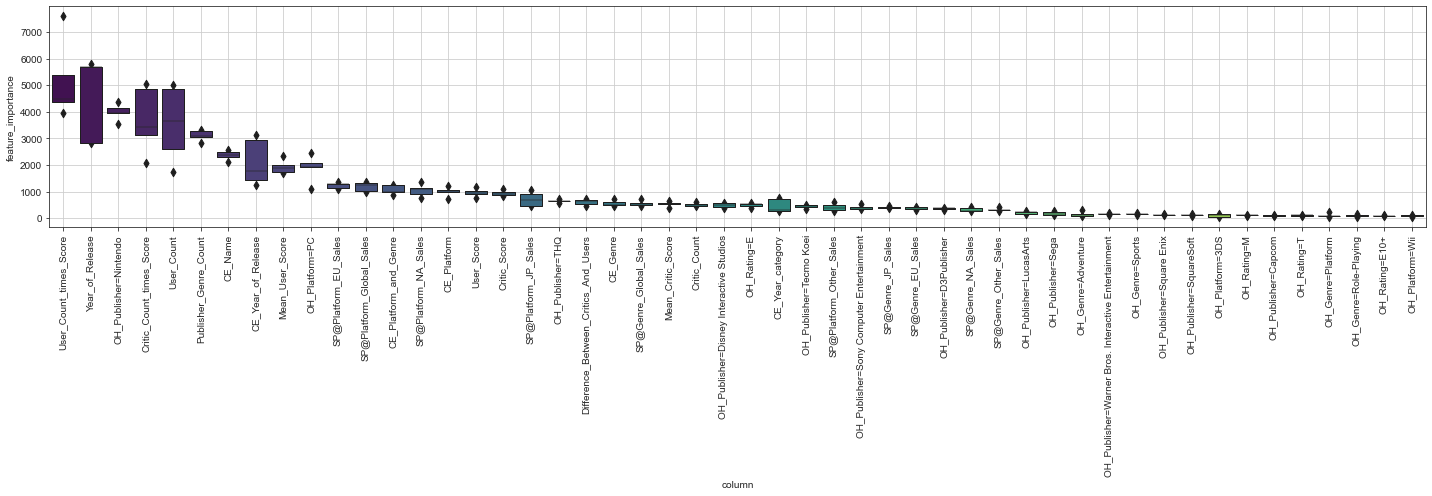

In [47]:
fig, ax = visualize_importance(models, train_feat_df)

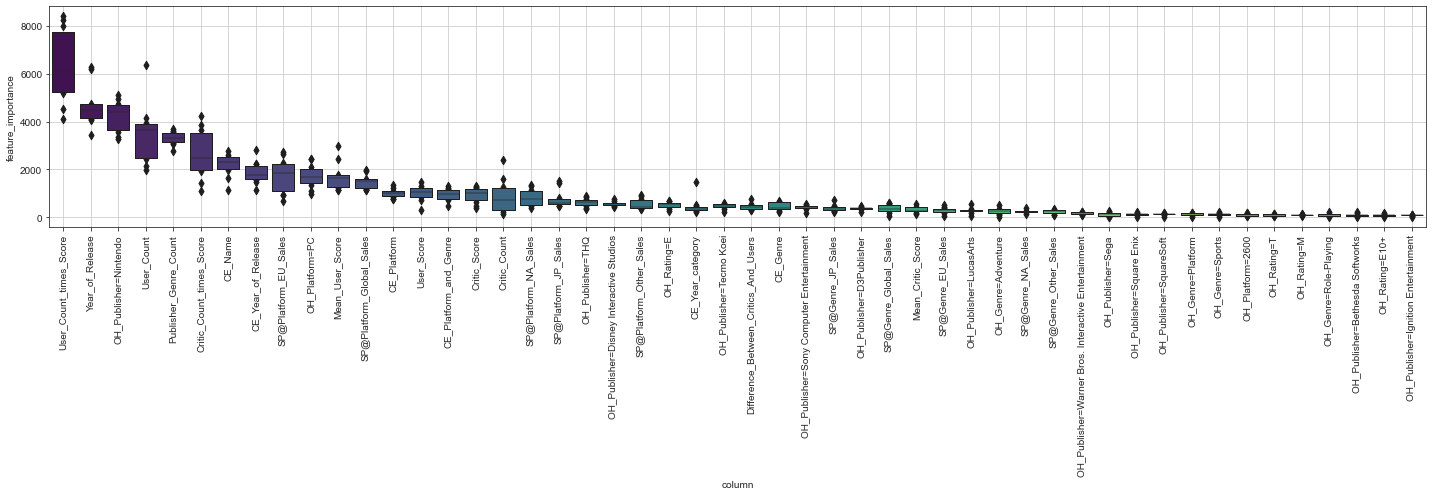

In [48]:
fig, ax = visualize_importance(g_models, train_feat_df)

In [49]:
from datetime import datetime

# subNum = 3
now = datetime.now().strftime('%Y%m%d%H%M%S')
sub_file = 'submission_{}.csv'.format(now)
g_sub_file = 'submission_g_{}.csv'.format(now)

#KFold
pred = np.array([model.predict(test_feat_df.values) for model in models])
pred = np.mean(pred, axis=0)
pred = np.expm1(pred)
pred = np.where(pred < 0, 0, pred)
sub_df = pd.DataFrame({ 'Global_Sales': pred })
sub_df.to_csv(os.path.join(OUTPUT_DIR, sub_file), index=False)

#GroupKFold
g_pred = np.array([model.predict(test_feat_df.values) for model in g_models])
g_pred = np.mean(g_pred, axis=0)
g_pred = np.expm1(g_pred)
g_pred = np.where(g_pred < 0, 0, g_pred)
g_sub_df = pd.DataFrame({ 'Global_Sales': g_pred })
g_sub_df.to_csv(os.path.join(OUTPUT_DIR, g_sub_file), index=False)

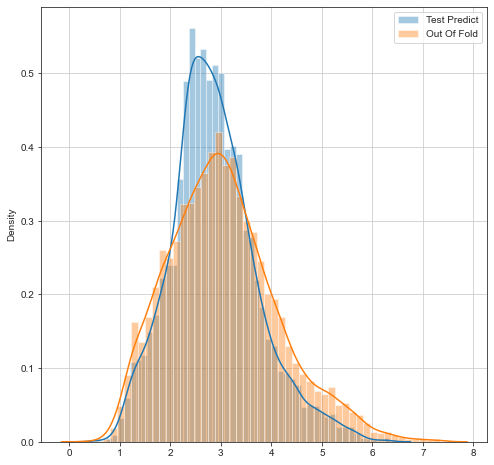

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(np.log1p(pred), label='Test Predict')
sns.distplot(oof, label='Out Of Fold')
ax.legend()
ax.grid()

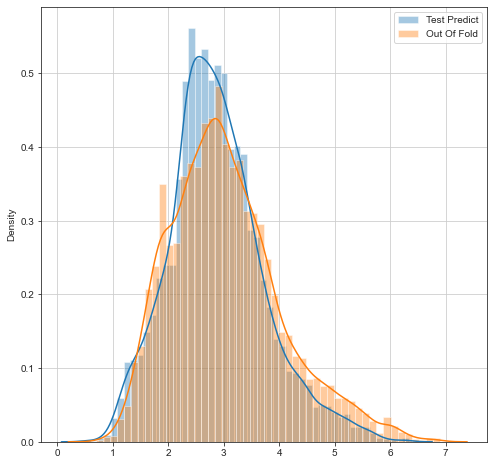

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(np.log1p(pred), label='Test Predict')
sns.distplot(g_oof, label='Out Of Fold')
ax.legend()
ax.grid()